# **`IMAGE TO IMAGE STABLE DIFFUSION`**

In [ ]:
!pip install diffusers
!pip install transformers scipy ftfy accelerate
!pip install compel

In [2]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline

import requests
from PIL import Image
from io import BytesIO

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
import PIL
from PIL import Image

# Code for visualization of input image and generated image
def image_grid(imgs, rows, cols):
    """
    This function takes a list of images and creates a grid of images from them.

    Args:
    imgs (list): List of images to be used in the grid.
    rows (int): Number of rows in the grid.

    Returns:
    grid (Image): The grid of images.
    """

    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

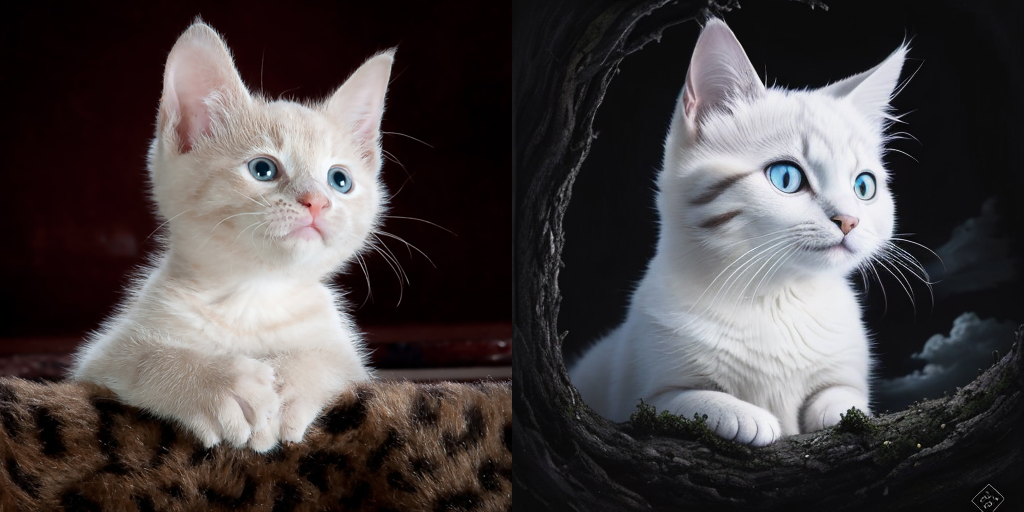

In [16]:
pipeline = StableDiffusionImg2ImgPipeline.from_pretrained("Lykon/dreamshaper-8", torch_dtype=torch.float16, variant="fp16", use_safetensors=True).to("cuda")
generator = torch.Generator(device="cuda").manual_seed(30)

url = "https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg"

response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image = init_image.resize((512, 512))

STYLE = "dark art"
RESOLUTION = "highly detailed, "
LIGHTING = "surrounded by clouds at night, "

prompt = "Portrait of a cat wizard, white color, serious face, putting on a black cloak" + RESOLUTION + LIGHTING + STYLE
negative_prompt = "ugly, poorly drawn, bad anatomy, mutation, signature, text, watermark"

image = pipeline(prompt=prompt, negative_prompt=negative_prompt, image=init_image, generator=generator).images[0]
image_grid([init_image, image], rows=1, cols=2)

### **HYPERPARAMETERS**

#### **1) STRENGTH**

Strength is one of the most effective hyperparameters in image generation process. It determines the effect of given image. A higher strength value ⬆ leads to a more creative generated image, while a lower strength value ⬇ can produce an image closely resembling the given one. Let's try it 🎉

  0%|          | 0/45 [00:00<?, ?it/s]

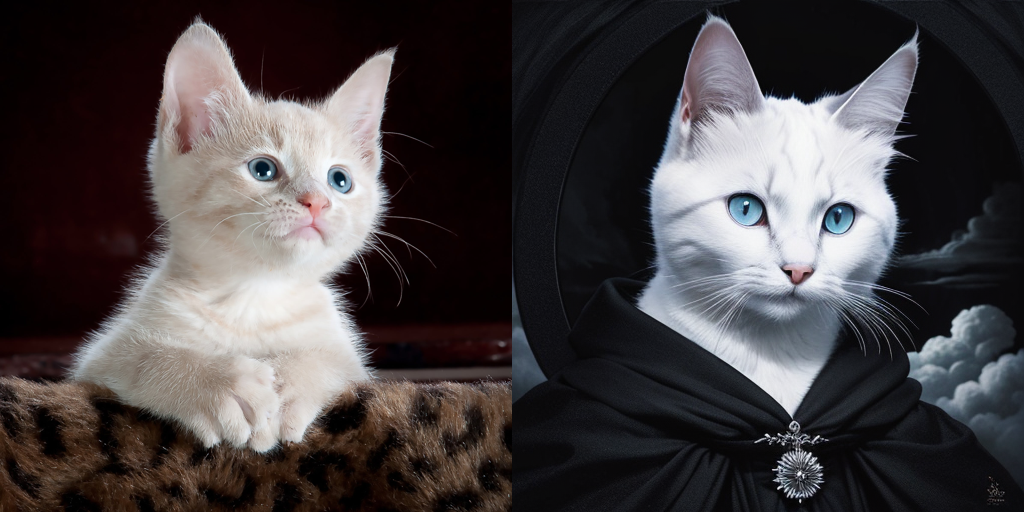

In [14]:
# Let's try strength=0.8.

generator = torch.Generator(device="cuda").manual_seed(30)

url = "https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg"

response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image = init_image.resize((512, 512))

STYLE = "dark art"
RESOLUTION = "highly detailed, "
LIGHTING = "surrounded by clouds at night,  "

prompt = "Portrait of a cat wizard, white color, serious face, wearing a black cloak" + RESOLUTION + LIGHTING + STYLE
negative_prompt = "ugly, poorly drawn, bad anatomy, mutation, signature, text, watermark"

image = pipeline(prompt=prompt, negative_prompt=negative_prompt, image=init_image, generator=generator, strength=0.9).images[0]
image_grid([init_image, image], rows=1, cols=2)

  0%|          | 0/10 [00:00<?, ?it/s]

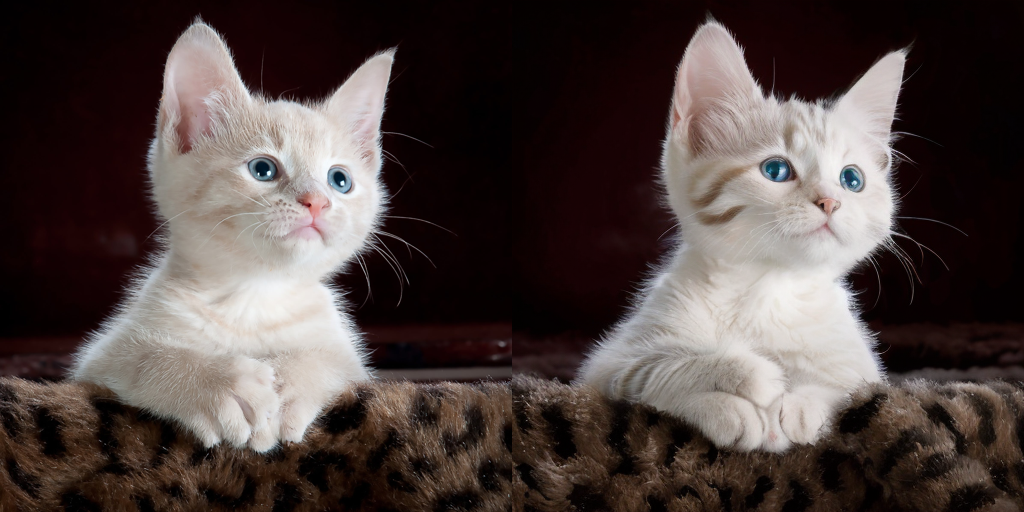

In [6]:
# Let's try strength=0.2.

generator = torch.Generator(device="cuda").manual_seed(30)

url = "https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg"

response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image = init_image.resize((512, 512))

STYLE = "dark art"
RESOLUTION = "highly detailed, "
LIGHTING = "surrounded by clouds at night, "

prompt = "Portrait of a cat wizard, white color, serious face, wearing a black cloak" + RESOLUTION + LIGHTING + STYLE
negative_prompt = "ugly, poorly drawn, bad anatomy, mutation, signature, text, watermark"

image = pipeline(prompt=prompt, negative_prompt=negative_prompt, image=init_image, generator=generator, strength=0.2).images[0]
image_grid([init_image, image], rows=1, cols=2)

#### **2) GUIDANCE SCALE**

Guidance scale is related to prompt. You can use **guidance_scale** and **strength** together to get more control. If guidance_scale is set to lower values, the model tends to be more creative to generate image. Conversely, the model tends to be stricter to follow the prompt if guidance_scale is set to be higher values. Let's try it :)

  0%|          | 0/30 [00:00<?, ?it/s]

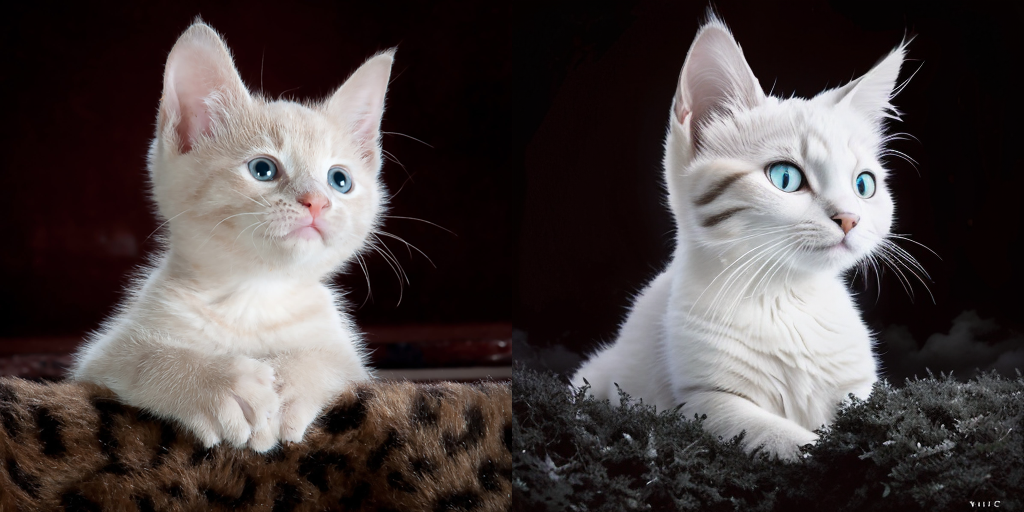

In [7]:
# Let's try guidance_scale=8.5.

generator = torch.Generator(device="cuda").manual_seed(30)

url = "https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg"

response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image = init_image.resize((512, 512))

STYLE = "dark art"
RESOLUTION = "highly detailed, "
LIGHTING = "surrounded by clouds at night, "

prompt = "Portrait of a cat wizard, white color, serious face, wearing a black cloak" + RESOLUTION + LIGHTING + STYLE
negative_prompt = "ugly, poorly drawn, bad anatomy, mutation, signature, text, watermark"

image = pipeline(prompt=prompt, negative_prompt=negative_prompt, image=init_image, generator=generator, guidance_scale=8.5, strength=0.6).images[0]
image_grid([init_image, image], rows=1, cols=2)

  0%|          | 0/37 [00:00<?, ?it/s]

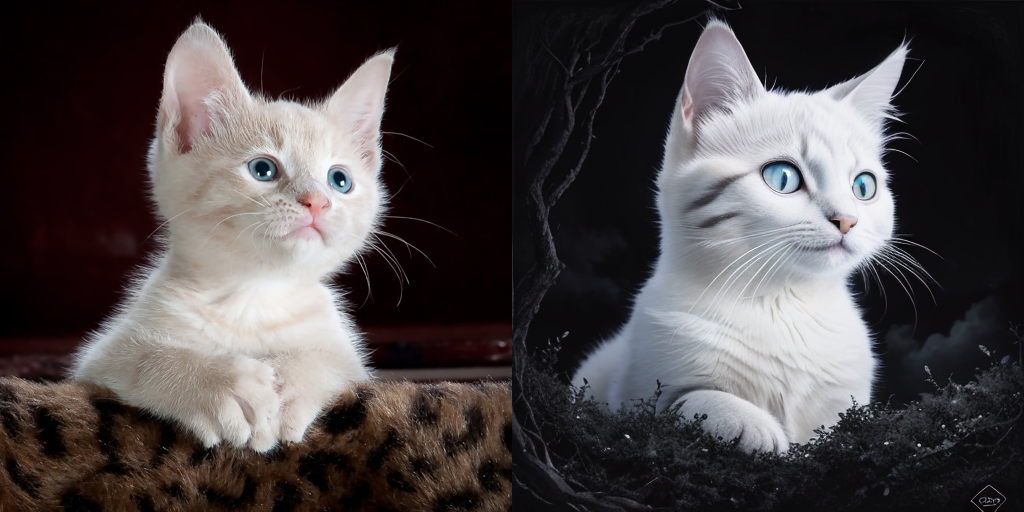

In [15]:
# Let's try guidance_scale=7.5 and strength=0.75.

generator = torch.Generator(device="cuda").manual_seed(30)

url = "https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg"

response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image = init_image.resize((512, 512))

STYLE = "dark art"
RESOLUTION = "highly detailed, "
LIGHTING = "surrounded by clouds at night, "

prompt = "Portrait of a cat wizard, white color, serious face, wearing a black cloak" + RESOLUTION + LIGHTING + STYLE
negative_prompt = "ugly, poorly drawn, bad anatomy, mutation, signature, text, watermark"

image = pipeline(prompt=prompt, negative_prompt=negative_prompt, image=init_image, generator=generator, guidance_scale=7.5, strength=0.75).images[0]
image_grid([init_image, image], rows=1, cols=2)

#### **3) CLIP SKIP**

Clip skip is a hyperparameter that allows you to skip some layers of the CLIP embedding process, leading to faster and more diverse results.

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

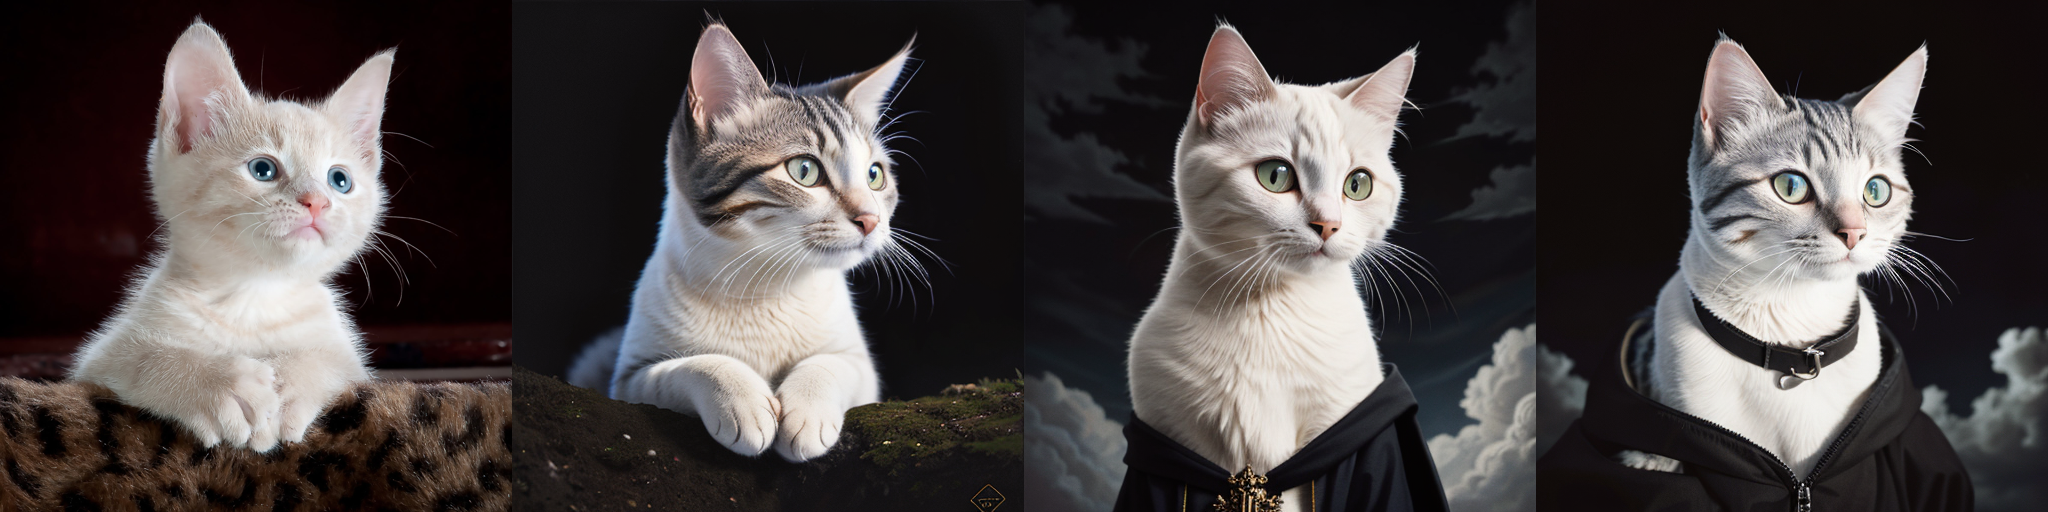

In [18]:
def generate_images_with_different_guidance_scales(prompt, negative_prompt, init_image, clip_skips, seed, device):

    generator = torch.Generator(device=device).manual_seed(seed)

    images = []
    images.append(init_image)
    for cs in clip_skips:
        image = pipeline(prompt=prompt, negative_prompt=negative_prompt, image=init_image, clip_skip=cs, generator=generator).images[0]
        images.append(image)

    grid = image_grid(images, 1, len(clip_skips))

    return grid

seed=30
device="cuda"

url = "https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg"

response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image = init_image.resize((512, 512))

STYLE = "dark art"
RESOLUTION = "highly detailed, "
LIGHTING = "surrounded by clouds at night, "

prompt = "Portrait of a cat wizard, white color, serious face, wearing a black cloak" + RESOLUTION + LIGHTING + STYLE
negative_prompt = "ugly, poorly drawn, bad anatomy, mutation, signature, text, watermark"

clip_skips = [1, 2, 3, 4]
grid = generate_images_with_different_guidance_scales(prompt, negative_prompt, init_image, clip_skips, seed, device)

grid